# CatBoost

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
#データ準備
df = sns.load_dataset('titanic')

#欠損値を削除 今回はバギングを試したいだけなのでただ欠損値を落とす
df.dropna(inplace=True)

# X, yを作成
y_col = ['survived','alive']
X = df.drop(columns=y_col)
y = df['survived']
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()

# #決定木では、ワンホットエンコーディングではなく、ラベルエンコーディングでもあまり問題ではない
# from sklearn.preprocessing import OrdinalEncoder
# oe = OrdinalEncoder()
# oe.set_output(transform='pandas') #←これを使うとDataFrameの形で返してくれる
# X = oe.fit_transform(X) #　このままではnumpyの形で返ってくる

#hold out
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [15]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(iterations=1000, learning_rate=0.01, cat_features=cat_cols)
eval_set = [(X_test, y_test)]
cbc.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10, verbose=True)

0:	learn: 0.6885366	test: 0.6868442	best: 0.6868442 (0)	total: 10.5ms	remaining: 10.5s
1:	learn: 0.6814490	test: 0.6793775	best: 0.6793775 (1)	total: 24.6ms	remaining: 12.3s
2:	learn: 0.6760508	test: 0.6726860	best: 0.6726860 (2)	total: 38.9ms	remaining: 12.9s
3:	learn: 0.6712676	test: 0.6671826	best: 0.6671826 (3)	total: 52.6ms	remaining: 13.1s
4:	learn: 0.6653107	test: 0.6593995	best: 0.6593995 (4)	total: 66ms	remaining: 13.1s
5:	learn: 0.6598695	test: 0.6518437	best: 0.6518437 (5)	total: 79.3ms	remaining: 13.1s
6:	learn: 0.6558456	test: 0.6467404	best: 0.6467404 (6)	total: 92ms	remaining: 13.1s
7:	learn: 0.6515199	test: 0.6413944	best: 0.6413944 (7)	total: 105ms	remaining: 13s
8:	learn: 0.6471426	test: 0.6356173	best: 0.6356173 (8)	total: 118ms	remaining: 13s
9:	learn: 0.6431772	test: 0.6310513	best: 0.6310513 (9)	total: 132ms	remaining: 13s
10:	learn: 0.6392733	test: 0.6260433	best: 0.6260433 (10)	total: 142ms	remaining: 12.8s
11:	learn: 0.6349835	test: 0.6211657	best: 0.6211657 (1

In [18]:
from sklearn.metrics import roc_auc_score
y_pred_cbc = cbc.predict_proba(X_test)
print(f'catboost AUC : {roc_auc_score(y_test, y_pred_cbc[:, 1])}')

catboost AUC : 0.8942307692307693


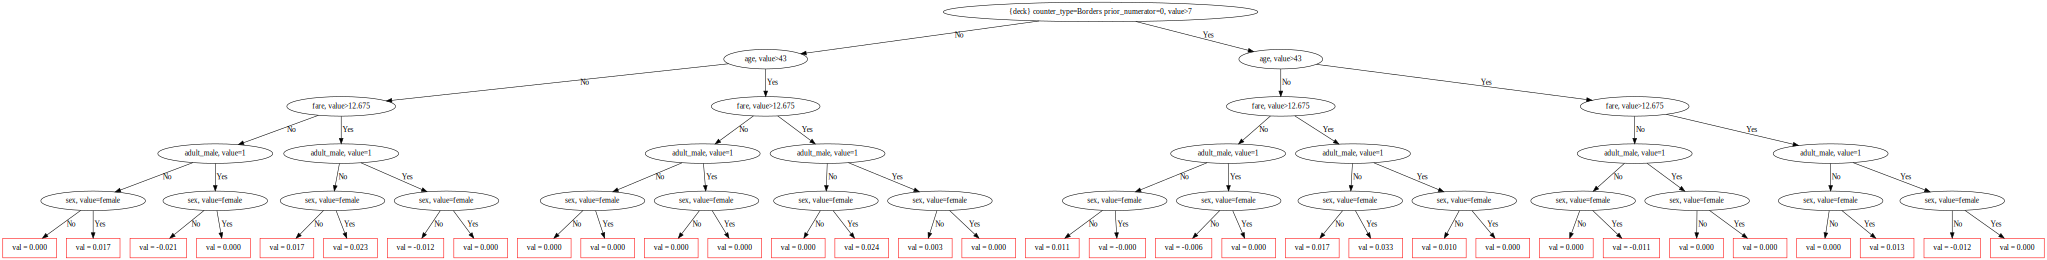

In [22]:
from catboost import Pool
pool = Pool(X_train, y_train, cat_features=cat_cols)
cbc.plot_tree(tree_idx=1, pool=pool)